Problem Statement: Prepare a model for the HR department to predict the Attrition and give the insights from the data about the important factors associated with the attrition so that HR can take the corrective or 
previntive measures to stop or control the attrition.

Attrition Def: Attrition is a term used to describe the gradual and natural reduction in the size of a workforce or customer base over time, typically due to voluntary or involuntary departures, such as resignations,  retirements, terminations, or death. It is often used in the context of human resources or customer management, and can have both positive and negative effects on an organization.

In a positive sense, attrition can help an organization to remove low-performing employees, create room for new talent, and save on costs associated with redundant positions. In a negative sense, however, attrition can result in the loss of experienced and valuable employees or customers, and can increase recruitment and training costs.

Attrition is often measured using metrics such as employee turnover rate or customer churn rate, and organizations may develop strategies to minimize attrition and retain their workforce or customer base.

  Attrition Rate = No. of employees left the workforce/Avg.no. of employess



1.Historical Data: (HR_Employee_Attrition_Data.csv) provided by LEARNBAY.

-The dataset contains Employee demographic information(age, gender, occupation, tenure etc).
-Reasons for leaving or discontinuing use (e.g. better job opportunity,  dissatisfaction, retirement, etc)
-Tenure, years at the current role etc.
-Employee saalry and other perks.
-Performance metrics (performance rating/satisfaction, job satisfaction).

2.How to use the information provided in the dataset?

-Identifying the key features to find the reasons and drwaing insights to   undestand the reason for employee turnover by  expolring and analysing the features and patterns.

3.How your analysis and insghts drawn help HR department?
-Targeted interventions to address the specific issues that are driving employees away.
-To improve the onboarding process and ensure that new employees feel supported and engaged from day one.
-Implement interventions to improve employee satisfaction and engagement.
-To provide benifits, oppurtunities for career growth by creating positive  work culture.


Attrition data analysis(EDA) includes
-Understanding the data.
-Pre-processing the data.
-Exploring the data.
-Transform the data.
-Data Modeling.
-Data Visualization.
-Data Communication.

# Exploratory data analysis(Attrition Dataset)

Import all the modules and the libraries required

In [1]:
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
# from sklearn.externals.six import StringIO 
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
import pydotplus
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [2]:
#import the dataset
df = pd.read_csv('cleaned_dataset_Attrition_imp_features.csv')

In [3]:
df.head(10)

,Attrition,Age,BusinessTravel,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,StockOptionLevel,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,Yes,41,Travel_Rarely,2,3,2,Sales Executive,4,Single,5993,Yes,0,8,1,6,4,5
1,No,49,Travel_Frequently,3,2,2,Research Scientist,2,Married,5130,No,1,10,3,10,7,7
2,Yes,37,Travel_Rarely,4,2,1,Laboratory Technician,3,Single,2090,Yes,0,7,3,0,0,0
3,No,33,Travel_Frequently,4,3,1,Research Scientist,3,Married,2909,Yes,0,8,3,8,7,0
4,No,27,Travel_Rarely,1,3,1,Laboratory Technician,2,Married,3468,No,1,6,3,2,2,2
5,No,32,Travel_Frequently,4,3,1,Laboratory Technician,4,Single,3068,No,0,8,2,7,7,6
6,No,59,Travel_Rarely,3,4,1,Laboratory Technician,1,Married,2670,Yes,3,12,2,1,0,0
7,No,30,Travel_Rarely,4,3,1,Laboratory Technician,3,Divorced,2693,No,1,1,3,1,0,0
8,No,38,Travel_Frequently,4,2,3,Manufacturing Director,3,Single,9526,No,0,10,3,9,7,8
9,No,36,Travel_Rarely,3,3,2,Healthcare Representative,3,Married,5237,No,2,17,2,7,7,7


In [4]:
df.shape

(1470, 17)

In [5]:
df.info() #to check null data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Attrition                1470 non-null   object
 1   Age                      1470 non-null   int64 
 2   BusinessTravel           1470 non-null   object
 3   EnvironmentSatisfaction  1470 non-null   int64 
 4   JobInvolvement           1470 non-null   int64 
 5   JobLevel                 1470 non-null   int64 
 6   JobRole                  1470 non-null   object
 7   JobSatisfaction          1470 non-null   int64 
 8   MaritalStatus            1470 non-null   object
 9   MonthlyIncome            1470 non-null   int64 
 10  OverTime                 1470 non-null   object
 11  StockOptionLevel         1470 non-null   int64 
 12  TotalWorkingYears        1470 non-null   int64 
 13  WorkLifeBalance          1470 non-null   int64 
 14  YearsAtCompany           1470 non-null  

In [6]:
df.isnull().values.any() #Checking if any missing values present

False

In [7]:
# del df['Unnamed: 10']

In [8]:
df.isnull().values.sum()

0

In [9]:
df.describe() # 5 Number Summary

,Age,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,StockOptionLevel,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,2.721769,2.729932,2.063946,2.728571,6502.931293,0.793878,11.279592,2.761224,7.008163,4.229252,4.123129
std,9.135373,1.093082,0.711561,1.106940,1.102846,4707.956783,0.852077,7.780782,0.706476,6.126525,3.623137,3.568136
min,18.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,1.000000,2.000000,2911.000000,0.000000,6.000000,2.000000,3.000000,2.000000,2.000000
50%,36.000000,3.000000,3.000000,2.000000,3.000000,4919.000000,1.000000,10.000000,3.000000,5.000000,3.000000,3.000000
75%,43.000000,4.000000,3.000000,3.000000,4.000000,8379.000000,1.000000,15.000000,3.000000,9.000000,7.000000,7.000000
max,60.000000,4.000000,4.000000,5.000000,4.000000,19999.000000,3.000000,40.000000,4.000000,40.000000,18.000000,17.000000


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.0,60.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.0,3.0,4.0,4.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.0,3.0,3.0,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.0,2.0,3.0,5.0
JobSatisfaction,1470.0,2.728571,1.102846,1.0,2.0,3.0,4.0,4.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.0,4919.0,8379.0,19999.0
StockOptionLevel,1470.0,0.793878,0.852077,0.0,0.0,1.0,1.0,3.0
TotalWorkingYears,1470.0,11.279592,7.780782,0.0,6.0,10.0,15.0,40.0
WorkLifeBalance,1470.0,2.761224,0.706476,1.0,2.0,3.0,3.0,4.0
YearsAtCompany,1470.0,7.008163,6.126525,0.0,3.0,5.0,9.0,40.0


The 'Attrition' feature will be our dependent variable/feature and rest all independent valriables/features

In [11]:
# Categorical columns
df.select_dtypes(include='object').columns

Index(['Attrition', 'BusinessTravel', 'JobRole', 'MaritalStatus', 'OverTime'], dtype='object')

In [12]:
len(df.select_dtypes(include='object').columns)

5

In [13]:
# numerical columns
df.select_dtypes(include='int64').columns

Index(['Age', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'StockOptionLevel',
       'TotalWorkingYears', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsWithCurrManager'],
      dtype='object')

In [14]:
len(df.select_dtypes(include='int64').columns)

12

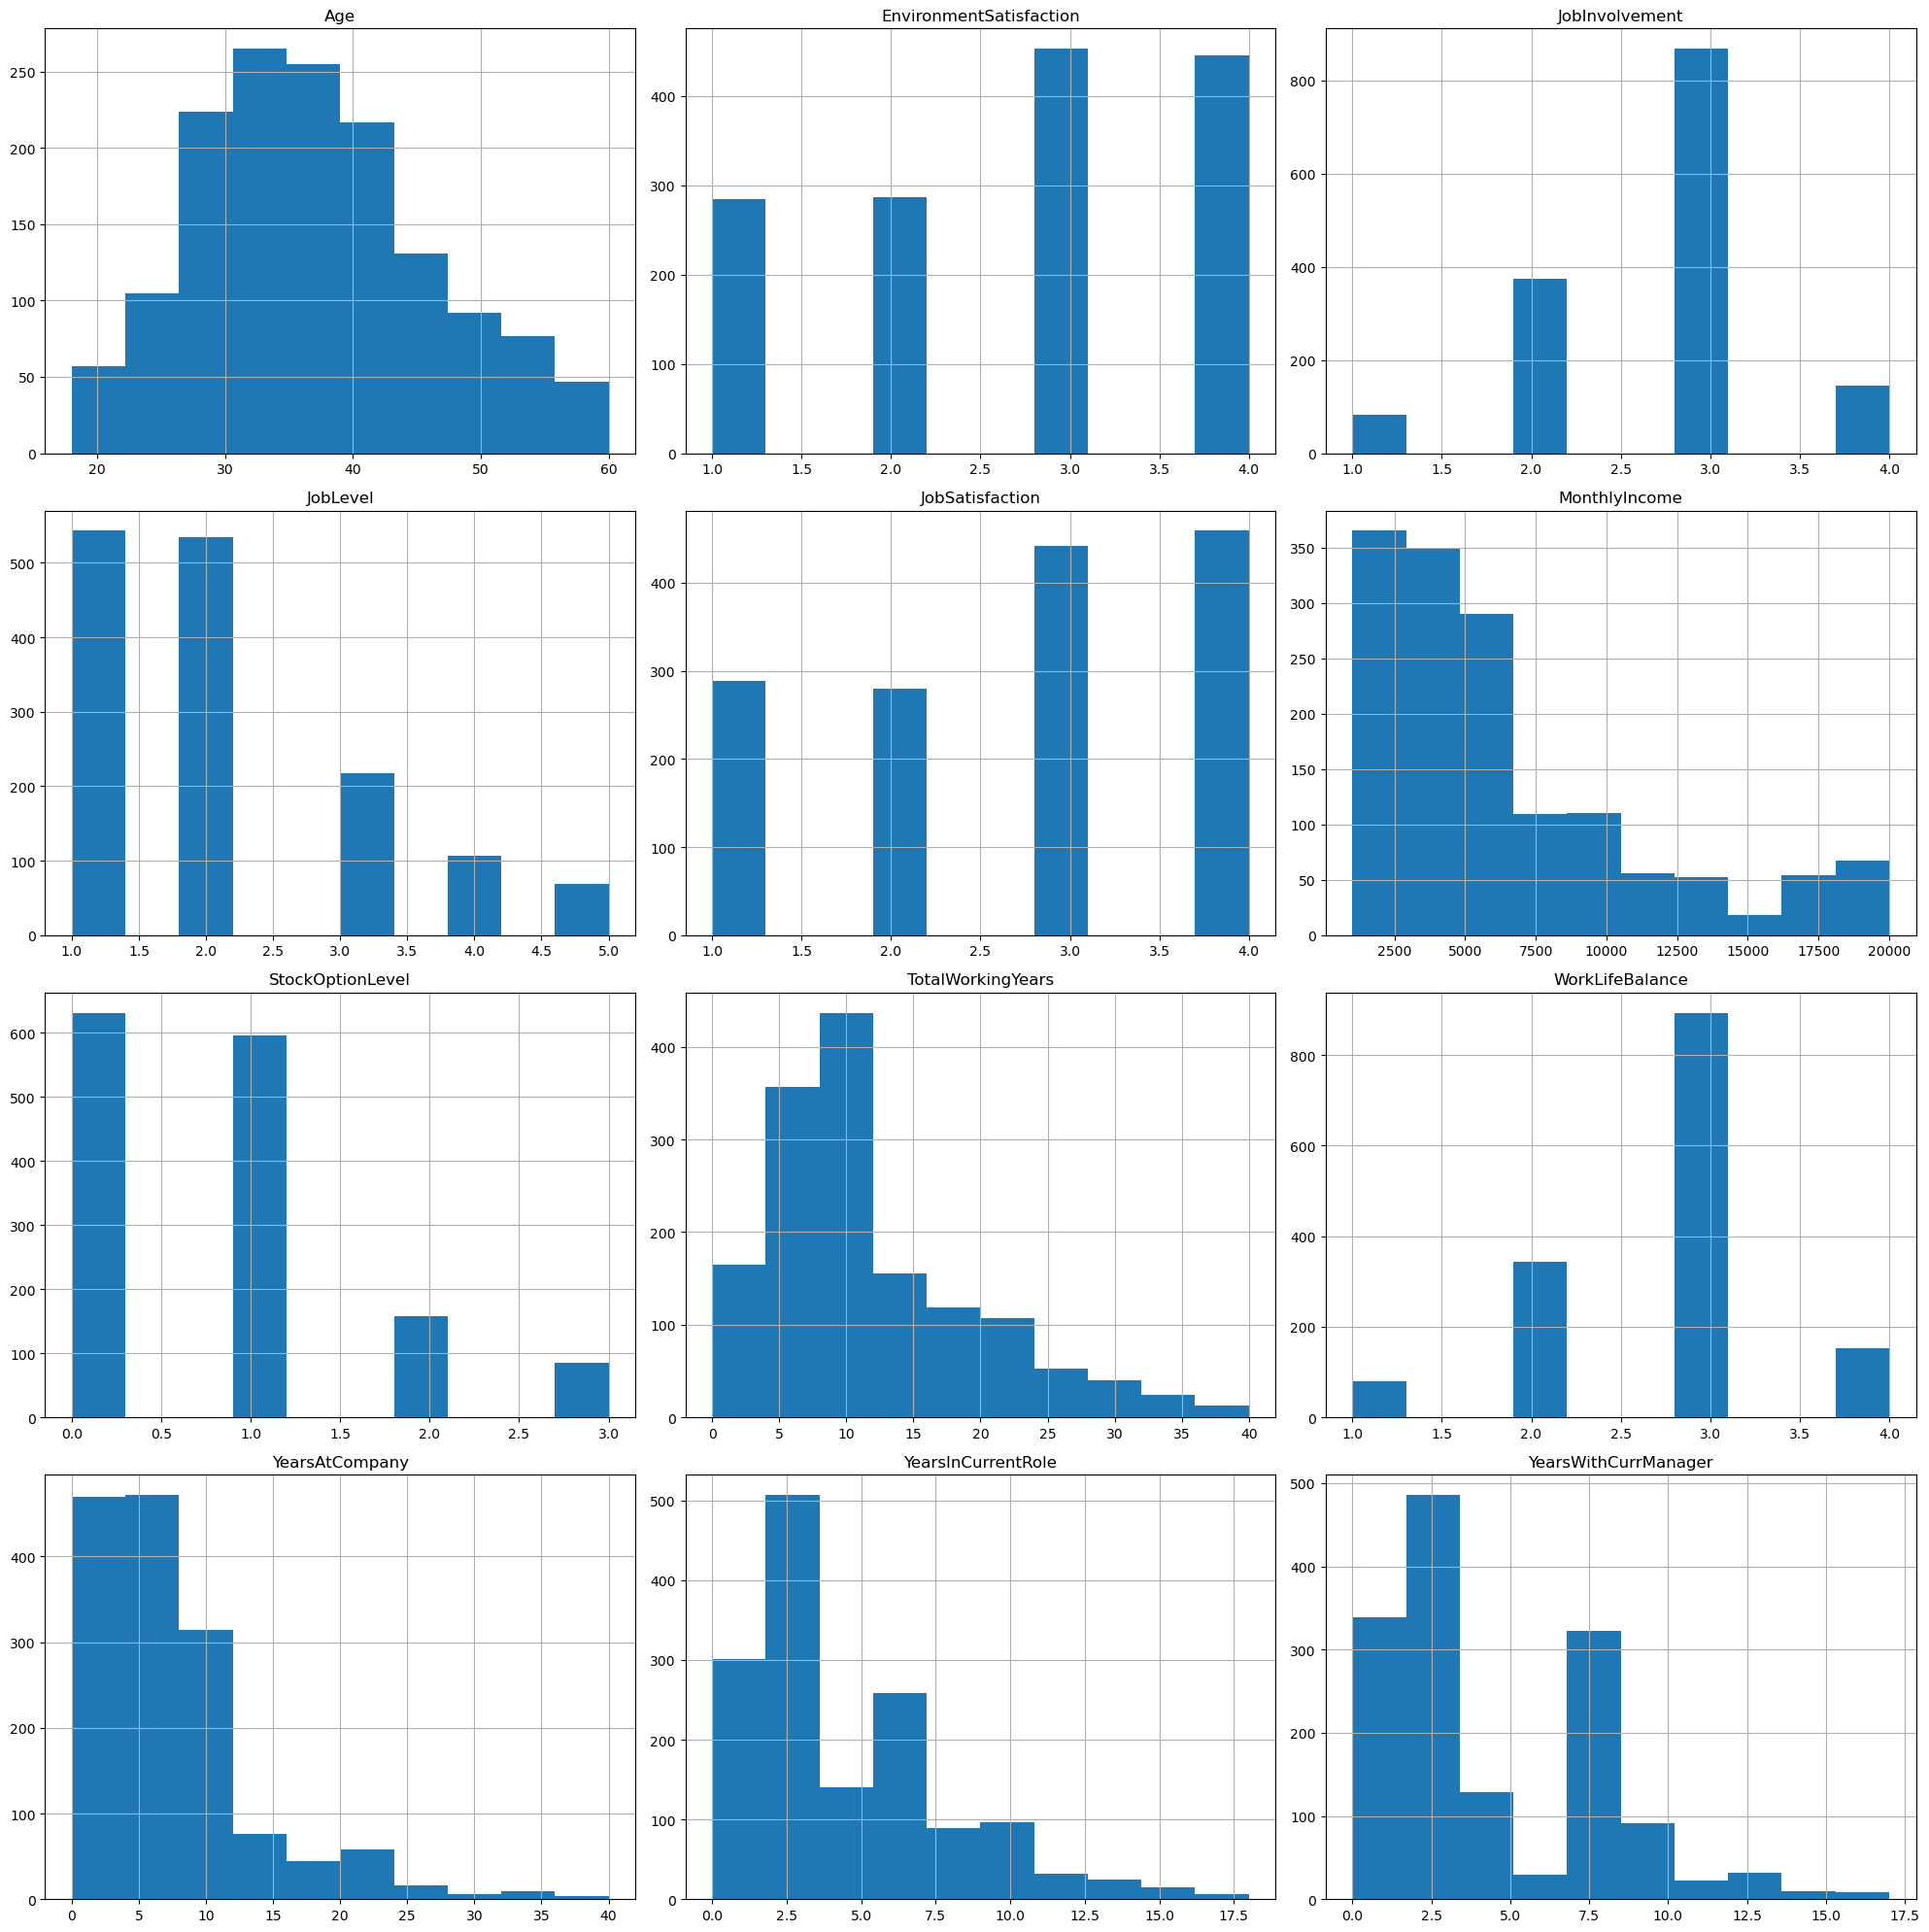

In [15]:
df.hist(figsize =(20,20))
plt.tight_layout()
plt.show()

By seeing the Histograms we cany say that most of the distibutions are right-skewed.
Age feature is not that right skewed. most of the employees are between 25-40 years age group.
Features like EmployeeCount and StandardHours can be ignored as they donot have relevant information useful to us.

In [16]:
# # #We can drop columns/features of no important or relavent
# df['EmployeeCount'].nunique()


In [17]:
# df['EmployeeNumber'].nunique()


In [18]:
# df['Over18'].nunique()


In [19]:
# df['StandardHours'].nunique()

In [20]:
# df = df.drop(columns=['EmployeeCount', 'EmployeeNumber' ,'Over18', 'StandardHours'])

In [21]:
df.head()

,Attrition,Age,BusinessTravel,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,StockOptionLevel,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,Yes,41,Travel_Rarely,2,3,2,Sales Executive,4,Single,5993,Yes,0,8,1,6,4,5
1,No,49,Travel_Frequently,3,2,2,Research Scientist,2,Married,5130,No,1,10,3,10,7,7
2,Yes,37,Travel_Rarely,4,2,1,Laboratory Technician,3,Single,2090,Yes,0,7,3,0,0,0
3,No,33,Travel_Frequently,4,3,1,Research Scientist,3,Married,2909,Yes,0,8,3,8,7,0
4,No,27,Travel_Rarely,1,3,1,Laboratory Technician,2,Married,3468,No,1,6,3,2,2,2


In [22]:
df.shape #we have dropped 3 features so shape (2940,32)

(1470, 17)

In [23]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.0,60.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.0,3.0,4.0,4.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.0,3.0,3.0,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.0,2.0,3.0,5.0
JobSatisfaction,1470.0,2.728571,1.102846,1.0,2.0,3.0,4.0,4.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.0,4919.0,8379.0,19999.0
StockOptionLevel,1470.0,0.793878,0.852077,0.0,0.0,1.0,1.0,3.0
TotalWorkingYears,1470.0,11.279592,7.780782,0.0,6.0,10.0,15.0,40.0
WorkLifeBalance,1470.0,2.761224,0.706476,1.0,2.0,3.0,3.0,4.0
YearsAtCompany,1470.0,7.008163,6.126525,0.0,3.0,5.0,9.0,40.0


C:\Users\swara\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


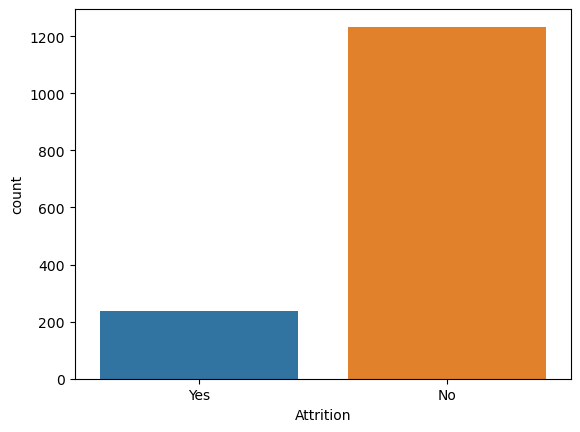

In [24]:
sns.countplot(df['Attrition']) 
plt.show()
#Attrition Count (tells about the employees left and working in the company)

In [25]:
# Employees left the company
(df.Attrition == 'Yes').sum()

237

In [26]:
# Employees with the company
(df.Attrition == 'No').sum()

1233

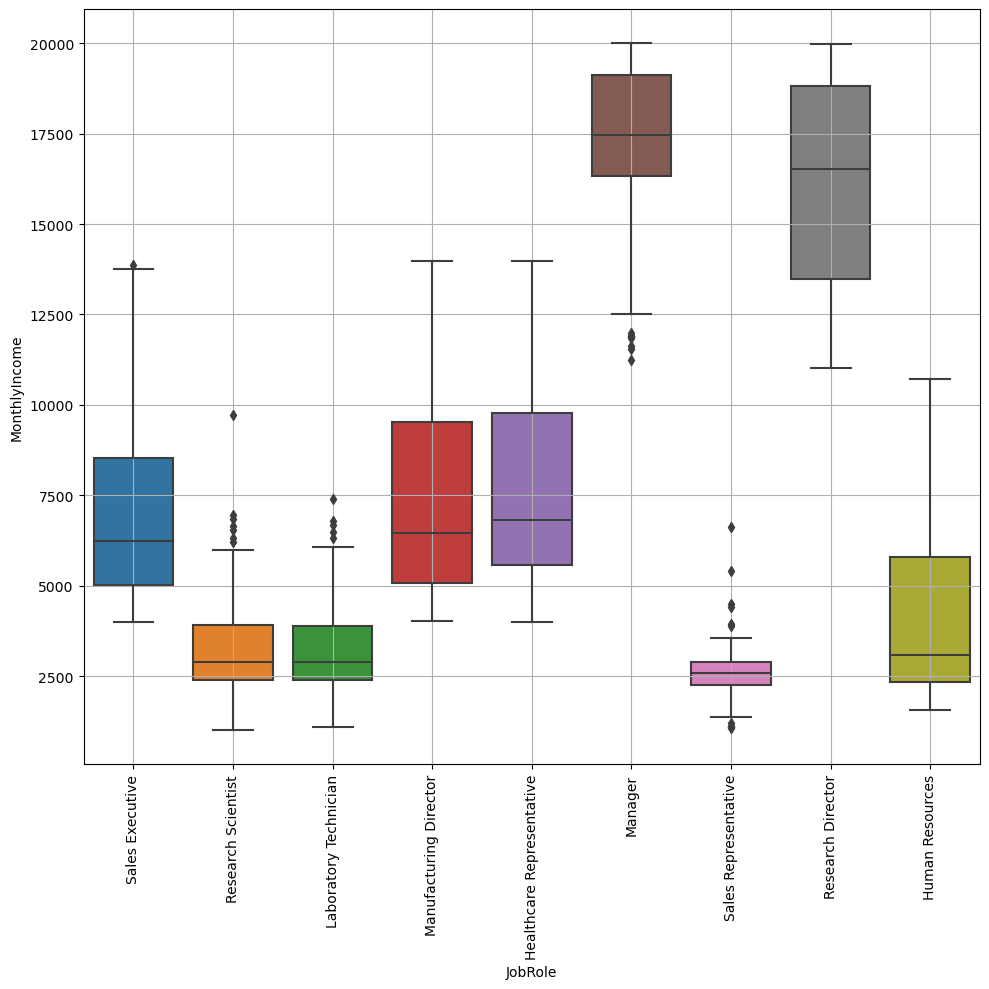

In [27]:
fig, ax = plt.subplots(1, figsize=(10, 10))
sns.boxplot(y=df['MonthlyIncome'], x=df['JobRole'])
plt.grid(True, alpha =1)
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

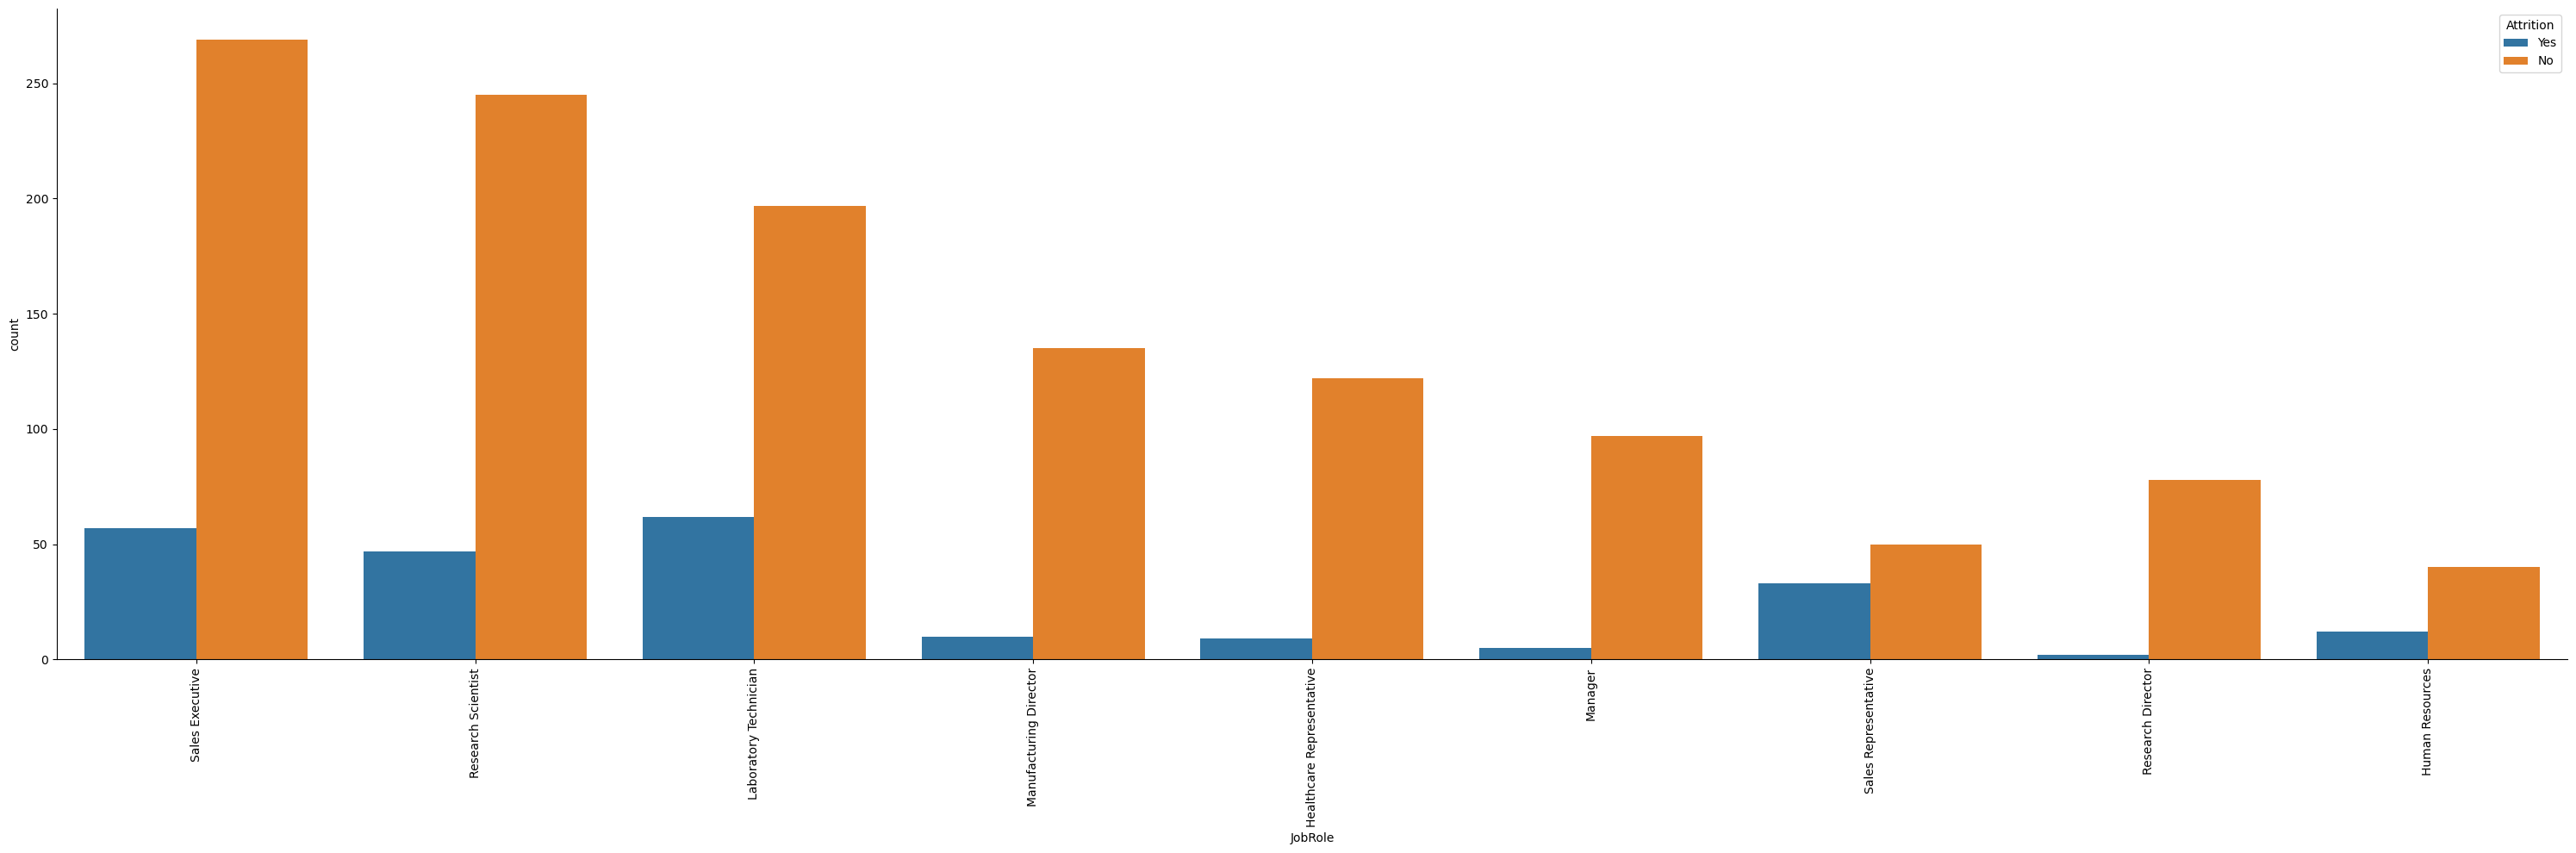

In [28]:
# fig, ax = plt.subplots(1, figsize=(10, 10))
sns.catplot(x='JobRole', hue ='Attrition', data =df, kind ='count', height =10 , aspect =3,legend =False)
plt.legend(loc='upper right', title ='Attrition')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='JobSatisfaction', ylabel='count'>

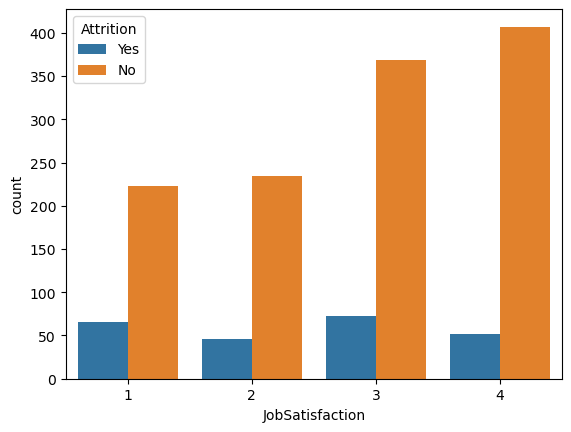

In [29]:

sns.countplot(x='JobSatisfaction', hue='Attrition', data=df)

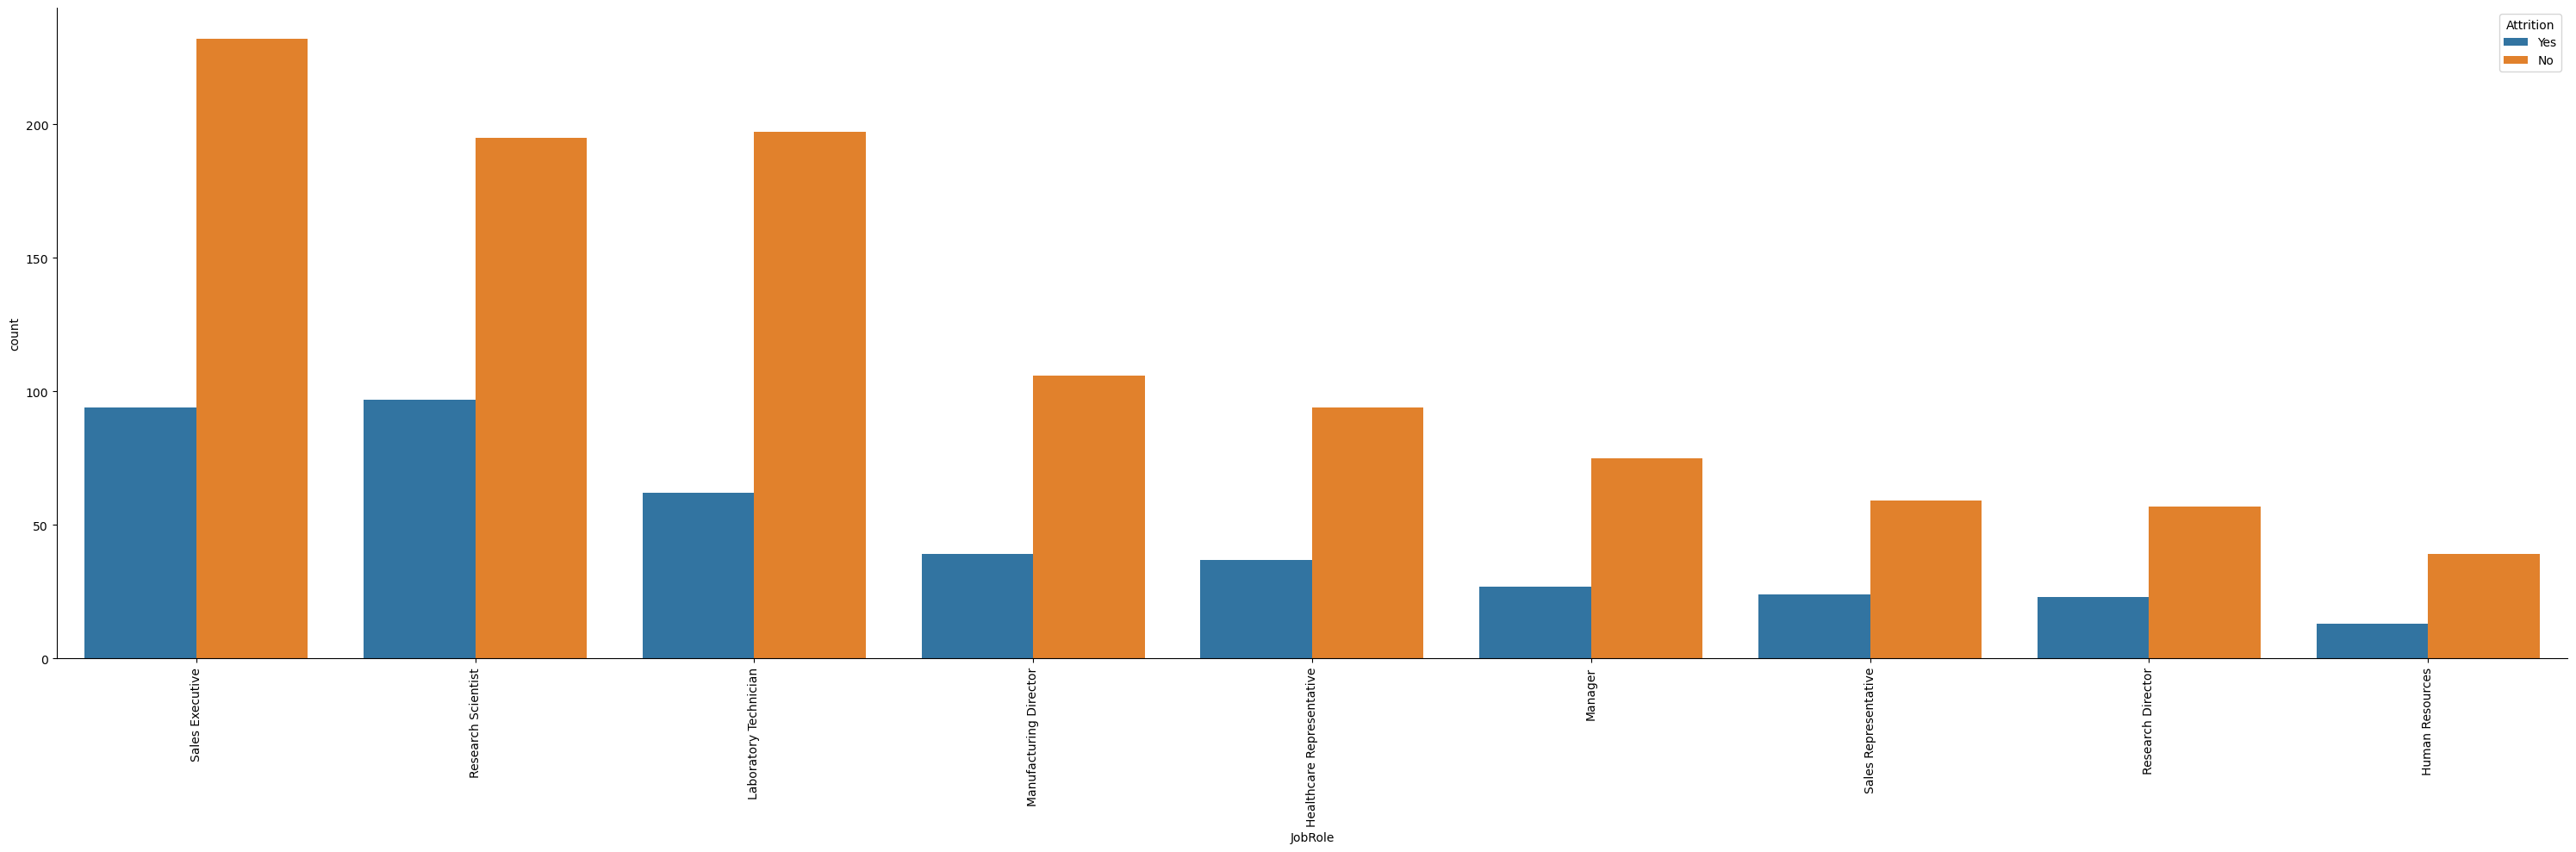

In [30]:
sns.catplot(x='JobRole', hue ='OverTime', data =df, kind ='count', height =10 , aspect =3,legend =False)
plt.legend(loc='upper right', title ='Attrition')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

By seeing the above box plot and other plots we can infer that the monthly income for Manager and Research Director job roles is high compared to the other. So there can be less chance of attrition in these job roles.
On the other hand monthly income is very less for Research Scientist, Laboratory Technichian and Sales Representative. So there is can be high chance of attrition in these job roles.

In [31]:
# Categorical columns
df.select_dtypes(include='object').columns

Index(['Attrition', 'BusinessTravel', 'JobRole', 'MaritalStatus', 'OverTime'], dtype='object')

In [32]:
#converting object datatypes to categorical datatypes.
for column in df.columns:
    if df[column].dtype =='object':
        df[column] = df[column].astype('category')
        df[column] = df[column].astype('category').cat.codes
        

In [33]:
corr = df.corr()

In [34]:
corr

,Attrition,Age,BusinessTravel,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,StockOptionLevel,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
Attrition,1.000000,-0.159205,0.000074,-0.103369,-0.130016,-0.169105,0.067151,-0.103481,0.162070,-0.159840,0.246118,-0.137145,-0.171063,-0.063939,-0.134392,-0.160545,-0.156199
Age,-0.159205,1.000000,0.024751,0.010146,0.029820,0.509604,-0.122427,-0.004892,-0.095029,0.497855,0.028062,0.037510,0.680381,-0.021490,0.311309,0.212901,0.202089
BusinessTravel,0.000074,0.024751,1.000000,0.004174,0.039062,0.019311,0.002724,-0.033962,0.024001,0.034319,0.016543,-0.016727,0.034226,-0.011256,-0.014575,-0.011497,-0.022636
EnvironmentSatisfaction,-0.103369,0.010146,0.004174,1.000000,-0.008278,0.001212,-0.017321,-0.006784,-0.003593,-0.006259,0.070132,0.003432,-0.002693,0.027627,0.001458,0.018007,-0.004999
JobInvolvement,-0.130016,0.029820,0.039062,-0.008278,1.000000,-0.012630,0.006616,-0.021476,-0.038497,-0.015271,-0.003507,0.021523,-0.005533,-0.014617,-0.021355,0.008717,0.025976
JobLevel,-0.169105,0.509604,0.019311,0.001212,-0.012630,1.000000,-0.085457,-0.001944,-0.076769,0.950300,0.000544,0.013984,0.782208,0.037818,0.534739,0.389447,0.375281
JobRole,0.067151,-0.122427,0.002724,-0.017321,0.006616,-0.085457,1.000000,0.017537,0.067957,-0.093951,0.040662,-0.019171,-0.145439,0.027764,-0.083657,-0.028354,-0.041150
JobSatisfaction,-0.103481,-0.004892,-0.033962,-0.006784,-0.021476,-0.001944,0.017537,1.000000,0.024360,-0.007157,0.024539,0.010690,-0.020185,-0.019459,-0.003803,-0.002305,-0.027656
MaritalStatus,0.162070,-0.095029,0.024001,-0.003593,-0.038497,-0.076769,0.067957,0.024360,1.000000,-0.075450,-0.017521,-0.662577,-0.077886,0.014708,-0.059986,-0.065822,-0.038570
MonthlyIncome,-0.159840,0.497855,0.034319,-0.006259,-0.015271,0.950300,-0.093951,-0.007157,-0.075450,1.000000,0.006089,0.005408,0.772893,0.030683,0.514285,0.363818,0.344079


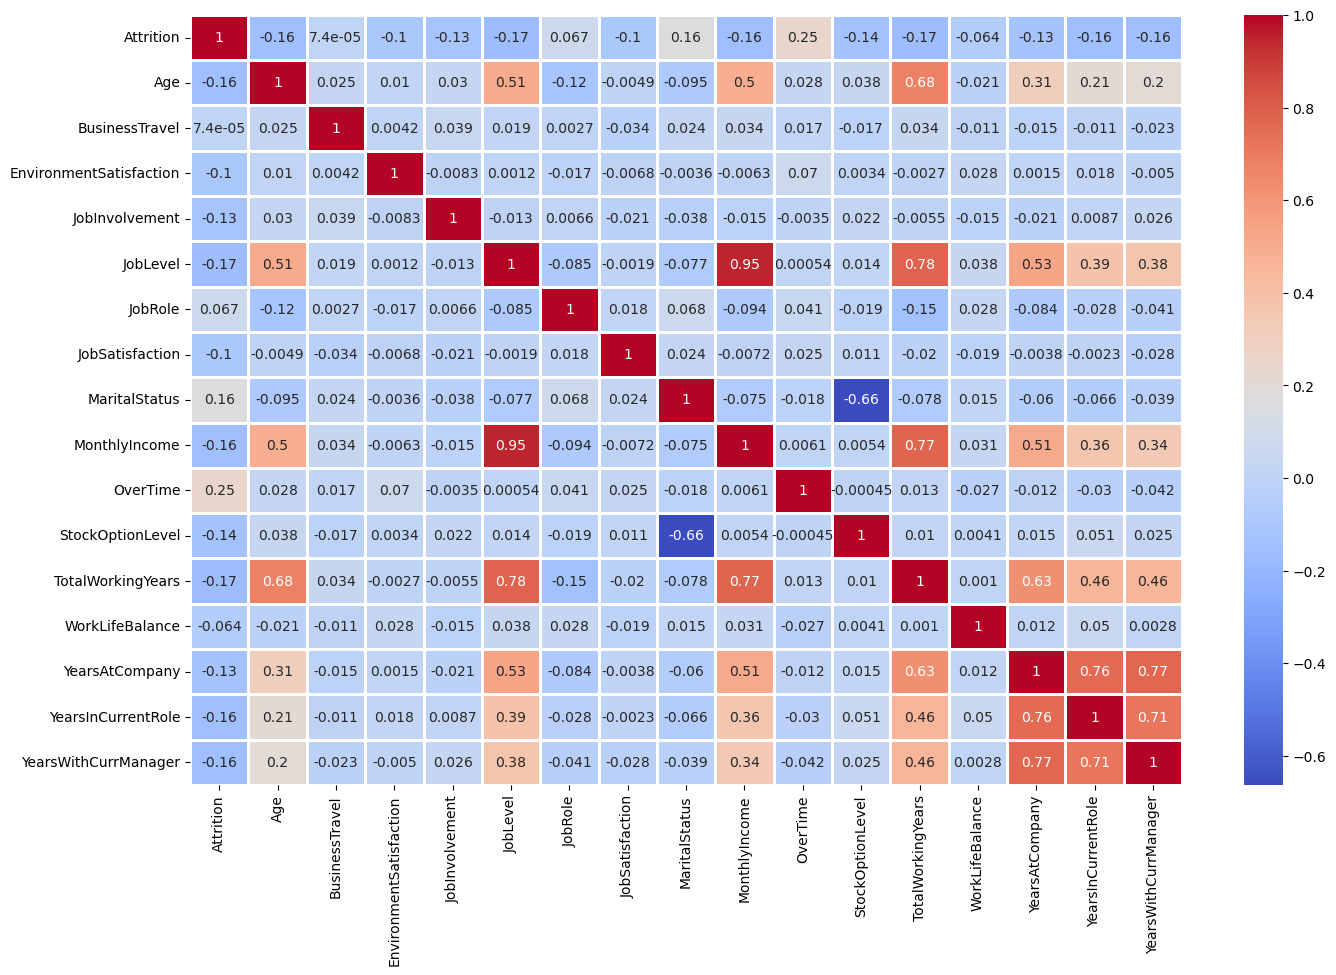

In [35]:
#Map/Matrix showing correlation between features
plt.figure(figsize =(16,10))
ax = sns.heatmap(corr, annot=True, linewidths =1, cmap='coolwarm')

In [36]:
corr_matrix = df.corr()

# Find highly correlated features
corr_threshold = 0.4
corr_pairs = {}
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > corr_threshold:
            corr_pairs[corr_matrix.columns[i] + " - " + corr_matrix.columns[j]] = corr_matrix.iloc[i, j]

# Print highly correlated features
for pair, corr in corr_pairs.items():
    print(pair + " : " + str(corr))

JobLevel - Age : 0.5096042284323842
MonthlyIncome - Age : 0.4978545669265801
MonthlyIncome - JobLevel : 0.9502999134798473
StockOptionLevel - MaritalStatus : -0.6625772916604346
TotalWorkingYears - Age : 0.6803805357911985
TotalWorkingYears - JobLevel : 0.7822078045362748
TotalWorkingYears - MonthlyIncome : 0.7728932462543574
YearsAtCompany - JobLevel : 0.5347386873756308
YearsAtCompany - MonthlyIncome : 0.5142848257331957
YearsAtCompany - TotalWorkingYears : 0.6281331552682468
YearsInCurrentRole - TotalWorkingYears : 0.46036463801180993
YearsInCurrentRole - YearsAtCompany : 0.7587537366134619
YearsWithCurrManager - TotalWorkingYears : 0.45918839708314385
YearsWithCurrManager - YearsAtCompany : 0.7692124251007031
YearsWithCurrManager - YearsInCurrentRole : 0.7143647616385931


In [37]:
# calculate correlation coefficients
correlations = df.corr()['Attrition'].drop('Attrition')

# print correlation coefficients in descending order
print(correlations.sort_values(ascending=False))

OverTime                   0.246118
MaritalStatus              0.162070
JobRole                    0.067151
BusinessTravel             0.000074
WorkLifeBalance           -0.063939
EnvironmentSatisfaction   -0.103369
JobSatisfaction           -0.103481
JobInvolvement            -0.130016
YearsAtCompany            -0.134392
StockOptionLevel          -0.137145
YearsWithCurrManager      -0.156199
Age                       -0.159205
MonthlyIncome             -0.159840
YearsInCurrentRole        -0.160545
JobLevel                  -0.169105
TotalWorkingYears         -0.171063
Name: Attrition, dtype: float64


In [38]:
#Split the dataset for training testing
# features


X = df.drop(columns='Attrition', axis= 1)
# target variable
y = df['Attrition']

# Splitting the dataset in 80:20(80% train data, 20% test data)

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
print(X_train.shape, type(X_train))

(1029, 16) <class 'pandas.core.frame.DataFrame'>


In [43]:
print(y_train.shape, type(y_train))

(1029,) <class 'pandas.core.series.Series'>


In [44]:
print(X_test.shape, type(X_test))

(441, 16) <class 'pandas.core.frame.DataFrame'>


In [45]:
print(y_test.shape, type(y_test))

(441,) <class 'pandas.core.series.Series'>


# Feature Sclaing/Standerdization

In [46]:
#Standerdization of data/Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [47]:
print(X_train, X_train.shape, type(X_train))

[[ 1.41369115  0.59277912  1.20114674 ... -0.32028746 -0.05899761
  -0.28567748]
 [-0.09834647  0.59277912 -0.62317798 ... -0.65002814 -0.60592139
  -0.85372023]
 [-1.71838678  0.59277912 -0.62317798 ... -0.97976881 -1.15284518
  -1.13774161]
 ...
 [-1.61038409 -0.92079337  0.28898438 ... -1.14463914 -1.15284518
  -1.13774161]
 [-0.85436528  0.59277912  1.20114674 ... -0.4851578  -0.3324595
  -0.28567748]
 [ 1.41369115  0.59277912  0.28898438 ... -0.97976881 -1.15284518
  -1.13774161]] (1029, 16) <class 'numpy.ndarray'>


In [48]:
print(y_train.shape, type(y_train))

(1029,) <class 'pandas.core.series.Series'>


In [49]:
print(X_test,X_test.shape, type(X_test))

[[-9.62367969e-01  5.92779116e-01  1.20114674e+00 ... -3.20287465e-01
  -5.89976093e-02 -2.85677478e-01]
 [ 1.73769921e+00  5.92779116e-01  1.20114674e+00 ... -4.85157800e-01
  -6.05921393e-01 -2.85677478e-01]
 [-1.39437872e+00  5.92779116e-01  1.20114674e+00 ... -9.79768807e-01
  -1.15284518e+00 -1.13774161e+00]
 ...
 [-9.62367969e-01  5.92779116e-01 -1.53534033e+00 ... -6.50028136e-01
  -6.05921393e-01 -5.69698854e-01]
 [ 2.25661592e-01  5.92779116e-01  1.20114674e+00 ... -3.20287465e-01
  -5.89976093e-02 -1.65610132e-03]
 [-2.06349158e-01  5.92779116e-01 -1.53534033e+00 ... -9.79768807e-01
  -1.15284518e+00 -1.13774161e+00]] (441, 16) <class 'numpy.ndarray'>


In [50]:
print(y_test.shape, type(y_test))

(441,) <class 'pandas.core.series.Series'>


Our objective is to predict the Attrition and give insights to HR Department to make further strategies to retain the talent and to find the replacement at the earliest.

Predicting Attrition (Target Feature) is a supervised binary classification task ( Either the employee stays or leaves the Company i.e. 1,0). 
There are different type of Supervised Machine Learning Algorithms to classify the features and a predict the future with best accuracy.
1.Decision Tree Classification
2.Random Forest
3.Logistic Regression
4.SVM Algorithm
We will compare accuracy scores for estimated predictions by the above mentioned classification models and predict the Attrition with best accuracy.
we need to train the Model and test the trained model to predict the future followed by Model Evaluation.


In [51]:
model.feature_importances_

array([0.08267857, 0.04350792, 0.06643065, 0.05882276, 0.0502109 ,
       0.06747909, 0.06323448, 0.05039327, 0.08258279, 0.07594126,
       0.04535671, 0.07228897, 0.06042118, 0.06365805, 0.05747172,
       0.05952168])

# Logistic Regression Model


In [54]:
from sklearn.linear_model import LogisticRegression
# instantiate the model (using the default parameters)
logreg = LogisticRegression()
# fit the model with data
logreg.fit(X_train,y_train)

LogisticRegression()

In [55]:
logreg.C

1.0

In [56]:
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [57]:
logreg.coef_

array([[-0.16193026, -0.0024373 , -0.36600993, -0.34600563, -0.07285262,
         0.12641947, -0.3994203 ,  0.56029243, -0.19053628,  0.74957419,
        -0.04751109, -0.33050904, -0.18251124,  0.51368998, -0.52336997,
        -0.26169571]])

In [58]:
coefs = pd.Series(index=X.columns,data=logreg.coef_[0])

In [59]:
coefs = coefs.sort_values()

In [60]:
coefs

YearsInCurrentRole        -0.523370
JobSatisfaction           -0.399420
EnvironmentSatisfaction   -0.366010
JobInvolvement            -0.346006
TotalWorkingYears         -0.330509
YearsWithCurrManager      -0.261696
MonthlyIncome             -0.190536
WorkLifeBalance           -0.182511
Age                       -0.161930
JobLevel                  -0.072853
StockOptionLevel          -0.047511
BusinessTravel            -0.002437
JobRole                    0.126419
YearsAtCompany             0.513690
MaritalStatus              0.560292
OverTime                   0.749574
dtype: float64

Linear Kernal

In [61]:
y_pred=logreg.predict(X_test)

Polynomial Kernal

In [62]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[370,  10],
       [ 48,  13]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

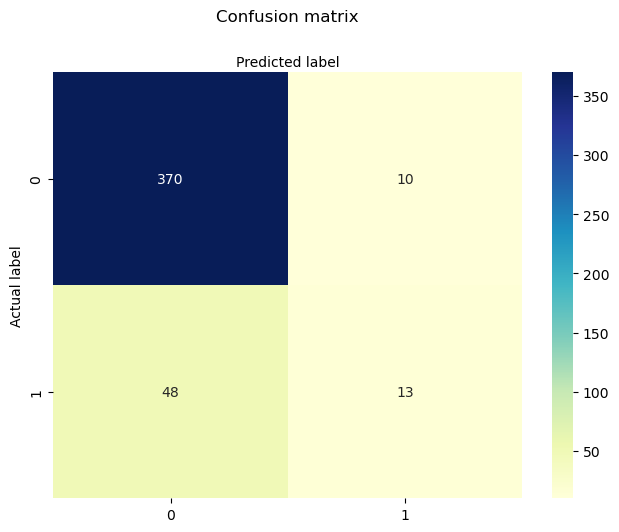

In [63]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [64]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8684807256235828
Precision: 0.5652173913043478
Recall: 0.21311475409836064


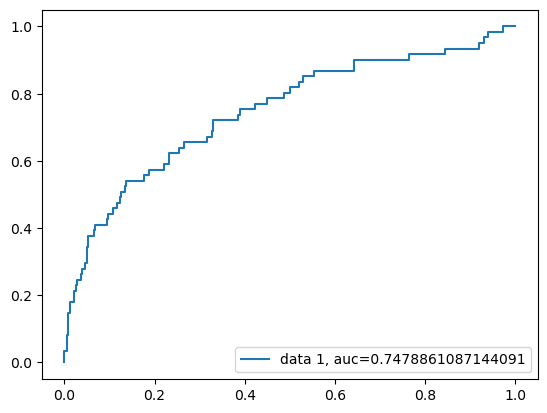

In [65]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [66]:
from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve

C:\Users\swara\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


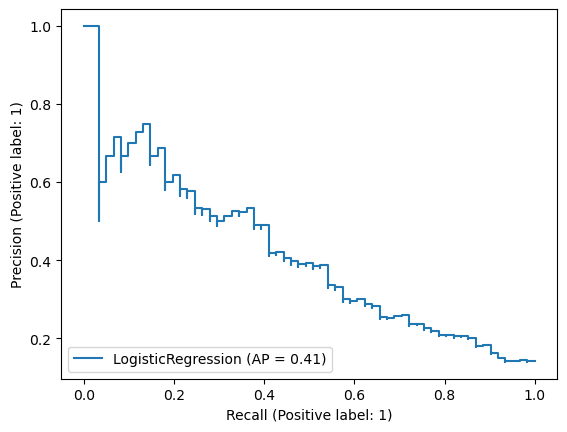

In [67]:
plot_precision_recall_curve(logreg,X_test,y_test)

C:\Users\swara\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


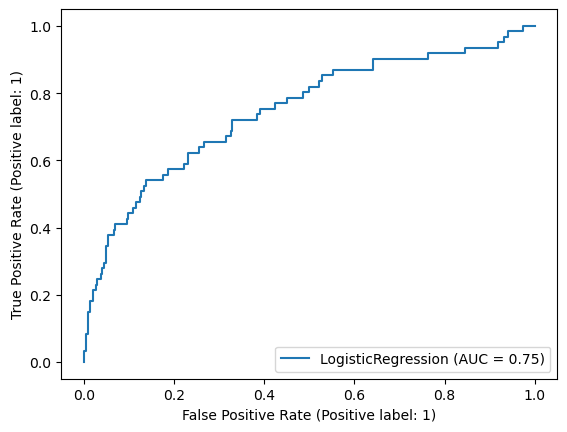

In [68]:
plot_roc_curve(logreg,X_test,y_test)